<a href="https://colab.research.google.com/github/slv-ai/TITANIC-ML-algorithm/blob/main/CNN%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Data Preparation

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [ ]:
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train=train.drop('label',axis=1)
y_train=train['label']

In [ ]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
#Normalize the data
X_train=X_train / 255.0
test=test / 255.0


In [ ]:
#Reshape the image in 3dimensions
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [ ]:
#label encoding
y_train=to_categorical(y_train,num_classes=10)

In [ ]:
random_seed=2
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=random_seed)

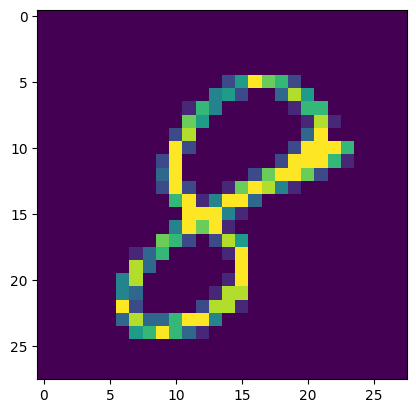

In [ ]:
g=plt.imshow(X_train[0][:,:,0])

CNN

In [ ]:
#Create model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [ ]:
#compile model
#optimizer=RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-7,decay=0.0)
#model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])
#epochs=1
#batch_size=120


In [ ]:
#Fit the model
#model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,batch_size=batch_size,verbose=2)

In [ ]:
#set a learning rate annealer
#learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
epochs=10
batch_size=120

In [ ]:
#Data Augmentation
imagen=ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,zca_whitening=False,rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False,vertical_flip=False)
imagen.fit(X_train)

In [ ]:
#Fit the model
history=model.fit_generator(imagen.flow(X_train,y_train,batch_size=120),epochs=epochs,validation_data=(X_val,y_val),steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


<ipython-input-45-6a95c6b7543f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(imagen.flow(X_train,y_train,batch_size=120),epochs=epochs,validation_data=(X_val,y_val),steps_per_epoch=X_train.shape[0] // batch_size)


315/315 [==============================] - 306s 970ms/step - loss: 0.4616 - accuracy: 0.8494 - val_loss: 0.0736 - val_accuracy: 0.9771
Epoch 2/10
315/315 [==============================] - 299s 950ms/step - loss: 0.1496 - accuracy: 0.9539 - val_loss: 0.0480 - val_accuracy: 0.9848
Epoch 3/10
315/315 [==============================] - 303s 963ms/step - loss: 0.1086 - accuracy: 0.9667 - val_loss: 0.0430 - val_accuracy: 0.9876
Epoch 4/10
315/315 [==============================] - 304s 966ms/step - loss: 0.0910 - accuracy: 0.9729 - val_loss: 0.0335 - val_accuracy: 0.9905
Epoch 5/10
315/315 [==============================] - 303s 961ms/step - loss: 0.0784 - accuracy: 0.9773 - val_loss: 0.0263 - val_accuracy: 0.9921
Epoch 6/10
315/315 [==============================] - 298s 947ms/step - loss: 0.0707 - accuracy: 0.9789 - val_loss: 0.0330 - val_accuracy: 0.9907
Epoch 7/10
315/315 [==============================] - 301s 957ms/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0226 - val_accura

Evaluate the model

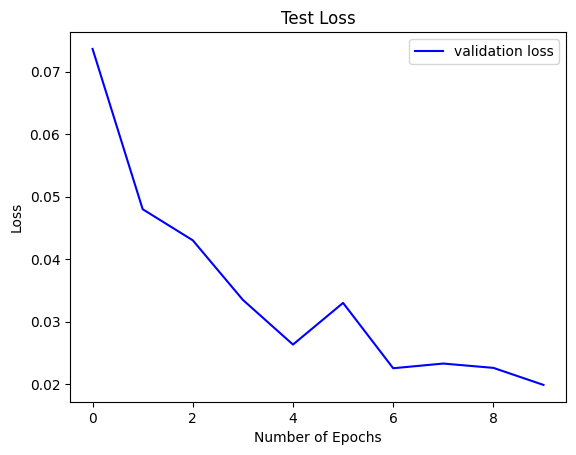

In [ ]:
plt.plot(history.history["val_loss"],color='b',label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Confusion matrix

132/132 [==============================] - 13s 95ms/step


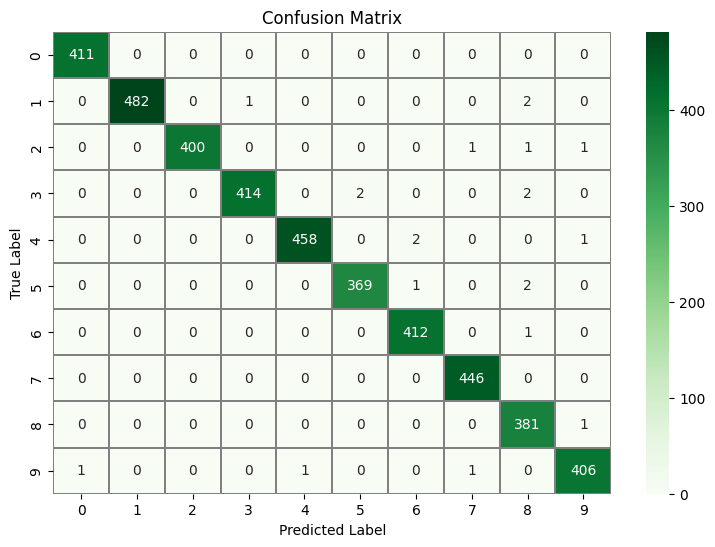

In [ ]:
import seaborn as sns
#convert validation observation to one hot vectors
y_true=np.argmax(y_val,axis=1)
#predict the values from validation set
y_pred=model.predict(X_val)
#convert prediction classes to one hot vectors
y_pred_classes=np.argmax(y_pred,axis=1)

#compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
#plot the confusion matrix,
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt='.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))

Class: 0
Number of Wrong Prediction: 0 out of 1000
Percentage of True Prediction: 41.10%
Class: 1
Number of Wrong Prediction: 3 out of 1000
Percentage of True Prediction: 48.20%
Class: 2
Number of Wrong Prediction: 3 out of 1000
Percentage of True Prediction: 40.00%
Class: 3
Number of Wrong Prediction: 4 out of 1000
Percentage of True Prediction: 41.40%
Class: 4
Number of Wrong Prediction: 3 out of 1000
Percentage of True Prediction: 45.80%
Class: 5
Number of Wrong Prediction: 3 out of 1000
Percentage of True Prediction: 36.90%
Class: 6
Number of Wrong Prediction: 1 out of 1000
Percentage of True Prediction: 41.20%
Class: 7
Number of Wrong Prediction: 0 out of 1000
Percentage of True Prediction: 44.60%
Class: 8
Number of Wrong Prediction: 1 out of 1000
Percentage of True Prediction: 38.10%
Class: 9
Number of Wrong Prediction: 3 out of 1000
Percentage of True Prediction: 40.60%


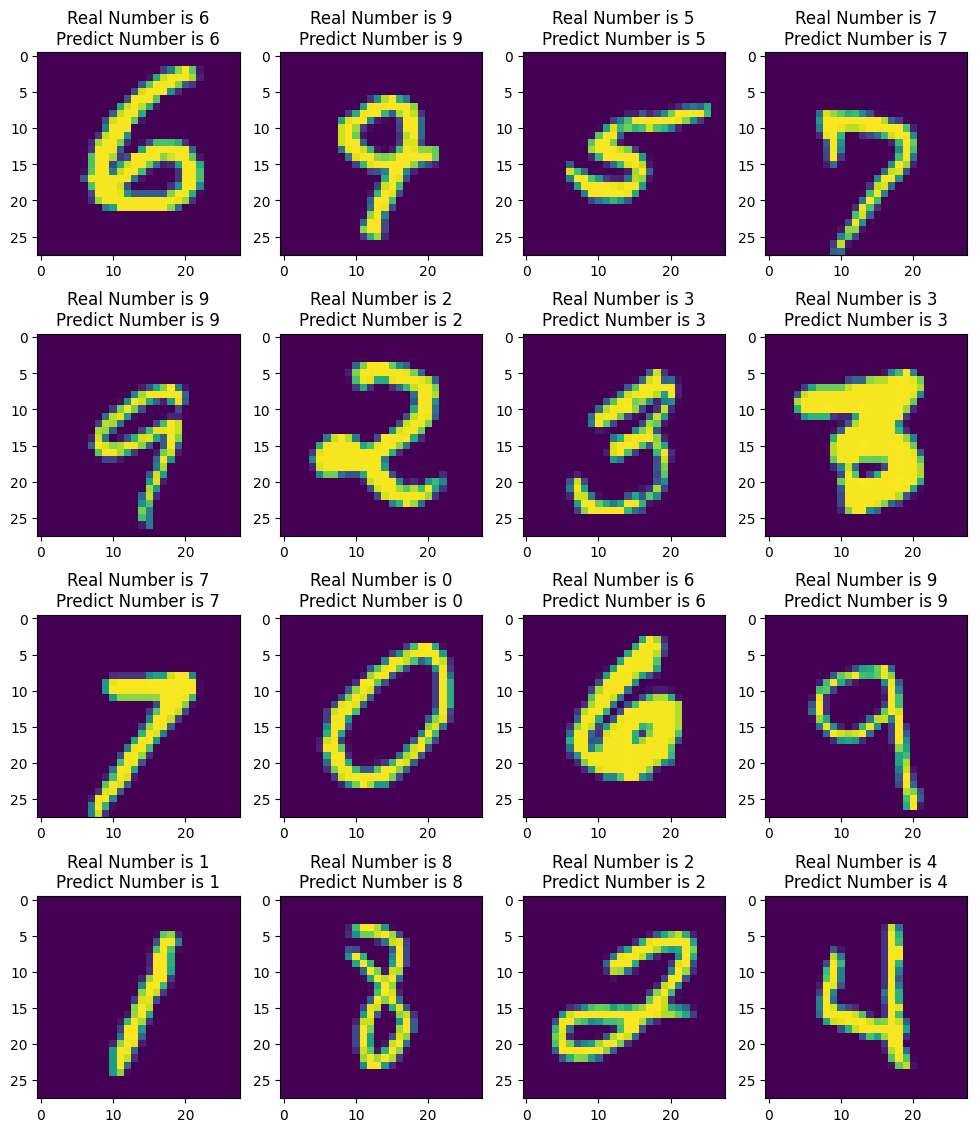

In [64]:
X_val1 = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_val1[i])
    ax.set(title = f"Real Number is {y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

Display some error results


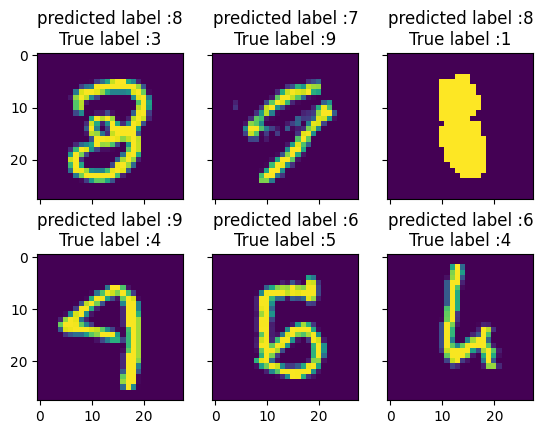

In [65]:
errors=(y_pred_classes-y_true != 0)

y_pred_classes_errors=y_pred_classes[errors]
y_pred_errors=y_pred[errors]
y_true_errors=y_true[errors]
X_val_errors=X_val[errors]

def display_errors(errors_index,img_errors,pred_errors,obs_errors):
  n=0
  nrows=2
  ncols=3
  fig,ax=plt.subplots(nrows,ncols,sharex=True,sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error=errors_index[n]
      ax[row,col].imshow((img_errors[error]).reshape((28,28)))
      ax[row,col].set_title("predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
      n += 1
#probabilities of wrong predicted numbers
y_pred_errors_prob=np.max(y_pred_errors,axis=1)
#predicted probabilities of the true values in the error set
true_prob_errors=np.diagonal(np.take(y_pred_errors,y_true_errors,axis=1))
#difference between the probability of the predicted label and the true label
diff_pred_true_errors=y_pred_errors_prob-true_prob_errors
#sorted list of delta prob errors
sorted_dela_errors=np.argsort(diff_pred_true_errors)
#top 6 errors
most_important_errors=sorted_dela_errors[-6:]
#show the top 6 errors
display_errors(most_important_errors,X_val_errors,y_pred_classes_errors,y_true_errors)



In [66]:
#predict the results
results=model.predict(test)
results=np.argmax(results,axis=1)


875/875 [==============================] - 65s 74ms/step


In [67]:
sub = pd.read_csv('sample_submission.csv')
# submissions
sub['Label'] = results
sub.to_csv("CNN_MNIST.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
